In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
x=np.random.randint(1,101,size=200)
y=3*np.power(x,1)+5

In [7]:
print(x)
print(y)

[ 98  84  76  15  63  71  58  74  52  50   9   2  70  51  32  38  48  72
   8  90  27  95  89   5  67  81  73  95  51  20  83  65  56  68  31   5
  13  43  51  14  71  41  51  45  11  78   2  93  52  31  45  30  56  64
  32  47  19  66  13   4  50  39  95   5  28  94  34  67  55  22  52  78
  75  50  69  83  72   7  36  29  32   4  56  79  50  70  46  28  54  48
  34  58  12  60  53  36  76  35  78  50  46   5  80  37  50  26  41  73
  64  55  91  25  53  67  54  14  10  84  26  65  70  21  80  83  40  13
  16 100   8  97  28  43  39  53  22  12  41  46  43  73  74  13  77  32
  76  69  85  86  42   2  88  45  30  18  56  39  32  72  95  28  73  75
  82  95  35  69  43  22  66  43  86  71  71  69  28  88  40  53  14  25
  12  34  29  69  66  35  69  77  13  84  92  18  36  60  25  99  95  15
  74  68]
[299 257 233  50 194 218 179 227 161 155  32  11 215 158 101 119 149 221
  29 275  86 290 272  20 206 248 224 290 158  65 254 200 173 209  98  20
  44 134 158  47 218 128 158 140  38 239 

In [8]:

def mse(x,y,y1):
  m=len(x)
  return (1/m)*np.sum(np.power(y-y1,2))


def gd(iter,alpha,x,y):
  a0=np.random.random()
  a1=np.random.random()

  l=alpha
  e=iter

  m=len(x)

  for i in range(e):
    y1=a0+a1*x
    d1=(-2/m)*np.sum(y-y1)
    d2=(-2/m)*np.sum((y-y1)*x)
    a0=a0-l*d1
    a1=a1-l*d2

  return [a0,a1]

In [9]:
gd(100000,0.0001,x,y)

[4.934207972940689, 3.0010212932627955]

In [10]:
class LinearRegression:
  def __init__(self, e ,lr):
    self.a0=np.random.random()
    self.a1=np.random.random()
    self.lr = lr
    self.e = e
    self.mx=[]
    self.my=[]
    self.ms=[]
    self.y1=[]

  def mse(x,y,y1):
    m=len(x)
    return (1/m)*np.sum(np.power(y-y1,2))

  def fit(self, x, y):
    l=self.lr
    m=len(x)

    for i in range(self.e):
      y1=(self.a0)+(self.a1)*x
      # print(mse(x,y,y1))
      self.y1.append(y1)
      self.ms.append(mse(x,y,y1))
      self.mx.append(self.a1)
      self.my.append(self.a0)
      d1=(-2/m)*np.sum(y-y1)
      d2=(-2/m)*np.sum((y-y1)*x)
      self.a0=(self.a0)-l*d1
      self.a1=(self.a1)-l*d2
 
  def predict(self, x):
    return self.a1 * x + self.a0
  
  def plotU(self,x,y):
    # print(mse(x,y,y1))
    print(self.a0," : ",self.a1)
    cf=[]
    p=np.arange(0,6,0.1)
    print(p)
    for s in p:
      y2=x*s+self.a0
      cf.append(mse(x,y,y2))
    print(s)
    print(cf)
    plt.scatter(p,cf)
    # for j in range(0,len(self.mx),2):
      # print(self.mx[j],self.ms[j])
      # plt.plot(self.mx[j:j+2],self.ms[j:j+2],'-r')

    plt.plot(self.mx,self.ms,'-r')
    # x1=np.arange(0,1,0.05)
    # for s in self.mx:
    #   y3=s*x1+self.a0
    #   plt.plot(x1,y3,'-r')
    #   print(x1,y3)
      # plt.show()

    plt.show()
  


0.7634220610954128  :  3.065744844664364
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9]
5.9
[30624.961070854843, 28659.921821580763, 26760.04157230668, 24925.320323032603, 23155.75807375852, 21451.35482448444, 19812.110575210358, 18238.025325936276, 16729.099076662194, 15285.331827388112, 13906.723578114035, 12593.27432883995, 11344.98407956587, 10161.85283029179, 9043.88058101771, 7991.067331743629, 7003.413082469546, 6080.917833195464, 5223.581583921385, 4431.404334647304, 3704.386085373223, 3042.5268360991417, 2445.8265868250596, 1914.285337550979, 1447.9030882768977, 1046.679839002818, 710.6155897287368, 439.7103404546557, 233.96409118057466, 93.37684190649365, 17.948592632413046, 7.679343358332066, 62.569094084251155, 182.6178448101704, 367.82559553608985, 618.192346262008, 933.71809698

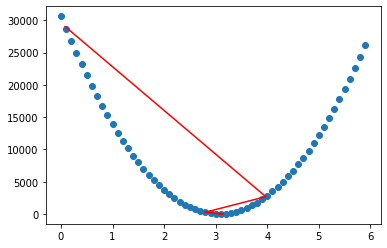

In [11]:
o=LinearRegression(10,0.0002)
o.fit(x,y)
o.plotU(x,y)

0.5074306794232004  :  3.069676123371368
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9]
5.9
[30704.868562349602, 28737.240216241284, 26834.770870132972, 24997.46052402466, 23225.309177916344, 21518.31683180803, 19876.48348569972, 18299.809139591405, 16788.293793483088, 15341.937447374776, 13960.740101266467, 12644.70175515815, 11393.822409049837, 10208.102062941522, 9087.540716833208, 8032.138370724894, 7041.89502461658, 6116.8106785082655, 5256.885332399954, 4462.118986291637, 3732.511640183325, 3068.0632940750115, 2468.7739479666966, 1934.6436018583825, 1465.6722557500686, 1061.8599096417563, 723.2065635334426, 449.71221742512864, 241.3768713168149, 98.2005252085012, 20.183179100187882, 7.324832991874147, 59.625486883560484, 177.0851407752469, 359.70379466693356, 607.4814485586189, 920.418

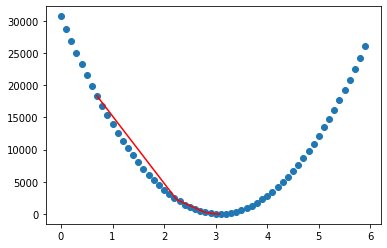

In [13]:
o=LinearRegression(10,0.0001)
o.fit(x,y)
o.plotU(x,y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9]
5.9
[30704.868562349602, 28737.240216241284, 26834.770870132972, 24997.46052402466, 23225.309177916344, 21518.31683180803, 19876.48348569972, 18299.809139591405, 16788.293793483088, 15341.937447374776, 13960.740101266467, 12644.70175515815, 11393.822409049837, 10208.102062941522, 9087.540716833208, 8032.138370724894, 7041.89502461658, 6116.8106785082655, 5256.885332399954, 4462.118986291637, 3732.511640183325, 3068.0632940750115, 2468.7739479666966, 1934.6436018583825, 1465.6722557500686, 1061.8599096417563, 723.2065635334426, 449.71221742512864, 241.3768713168149, 98.2005252085012, 20.183179100187882, 7.324832991874147, 59.625486883560484, 177.0851407752469, 359.70379466693356, 607.4814485586189, 920.4181024503054, 1298.5137563419917, 1741.7684

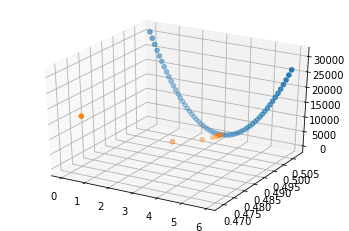

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cf=[]
p=np.arange(0,6,0.1)
print(p)
for s in p:
  y2=x*s+o.a0
  cf.append(mse(x,y,y2))
print(s)
print(cf)
# plt.scatter(p,cf)
ax.scatter(p,np.full(len(p),o.a0),cf,marker='o')
ax.scatter(o.mx,o.my,o.ms,marker='o')
print(o.mx)
 
plt.show()